In [2]:
import pandas as pd
import os

input_dir = './'  

results_list = []

for year in range(2015, 2025):
    file_path = os.path.join(input_dir, f'population_{year}.csv')
    
    # data of the year
    yearly_data = pd.read_csv(file_path)
    
    # max and min happiness score of the year
    max_row = yearly_data.loc[yearly_data['PopTotal'].idxmax()]
    min_row = yearly_data.loc[yearly_data['PopTotal'].idxmin()]
    
    results_list.append({
        'Year': year,
        'Top Country': max_row['Location'],
        'Max Population': max_row['PopTotal'],
        'Bottom Country': min_row['Location'],
        'Min Population': min_row['PopTotal']
    })

results = pd.DataFrame(results_list)
print(results)

   Year Top Country  Max Population Bottom Country  Min Population
0  2015       China     1396134.174       Holy See           0.572
1  2016       China     1404052.632       Holy See           0.563
2  2017       China     1412354.727       Holy See           0.555
3  2018       China     1419008.956       Holy See           0.545
4  2019       China     1423520.357       Holy See           0.536
5  2020       China     1426106.093       Holy See           0.528
6  2021       China     1426437.267       Holy See           0.519
7  2022       India     1425423.212       Holy See           0.506
8  2023       India     1438069.596       Holy See           0.496
9  2024       India     1450935.791       Holy See           0.496


In [8]:
import matplotlib.pyplot as plt

def plot_population_time(country):
    pop_total = []
    pop_male = []
    pop_female = []
    years = []

    for year in range(2015, 2025):
        file_path = os.path.join(input_dir, f'population_{year}.csv')
        yearly_data = pd.read_csv(file_path)
        row = yearly_data[yearly_data['Location'] == country]
        if not row.empty:
            pop_total.append(row['PopTotal'].values[0])
            pop_male.append(row['PopMale'].values[0])
            pop_female.append(row['PopFemale'].values[0])
            years.append(year)
    
    plt.figure(figsize=(10, 6))
    plt.plot(years, pop_total, label='Total Population', marker='o')
    plt.plot(years, pop_male, label='Male Population', marker='o')
    plt.plot(years, pop_female, label='Female Population', marker='o')
    plt.title(f'Population Trends for {country} (2015-2024)')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.show()

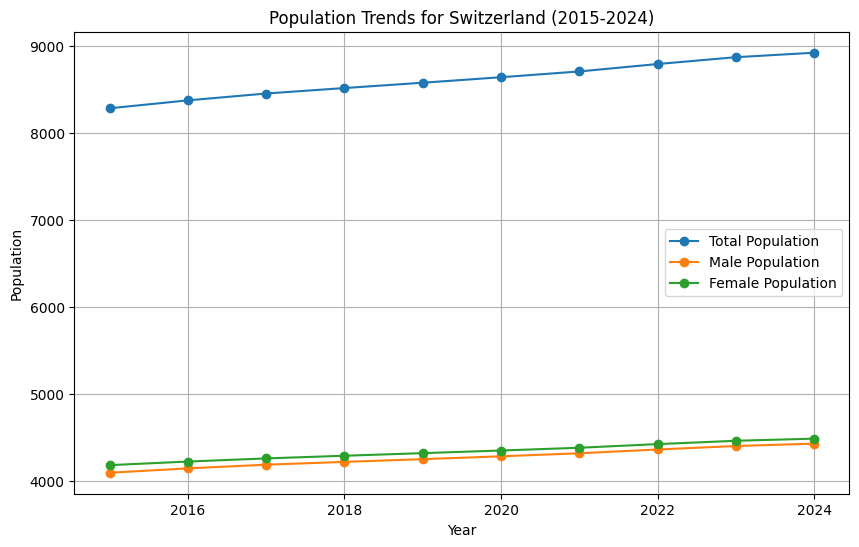

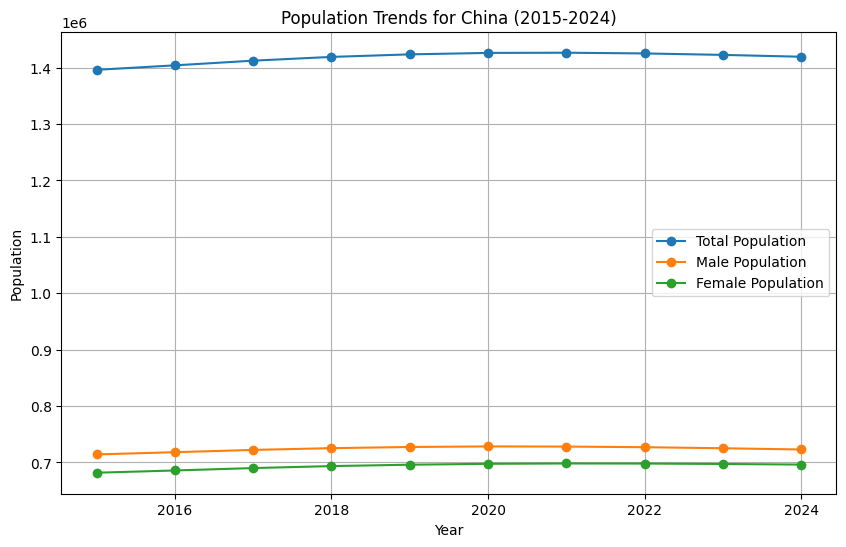

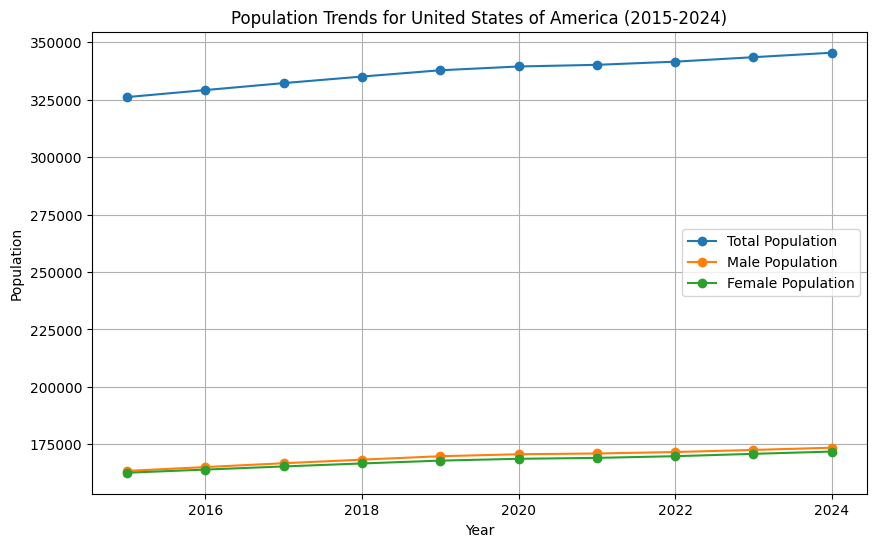

In [10]:
plot_population_time("Switzerland")
plot_population_time("China")
plot_population_time("United States of America")

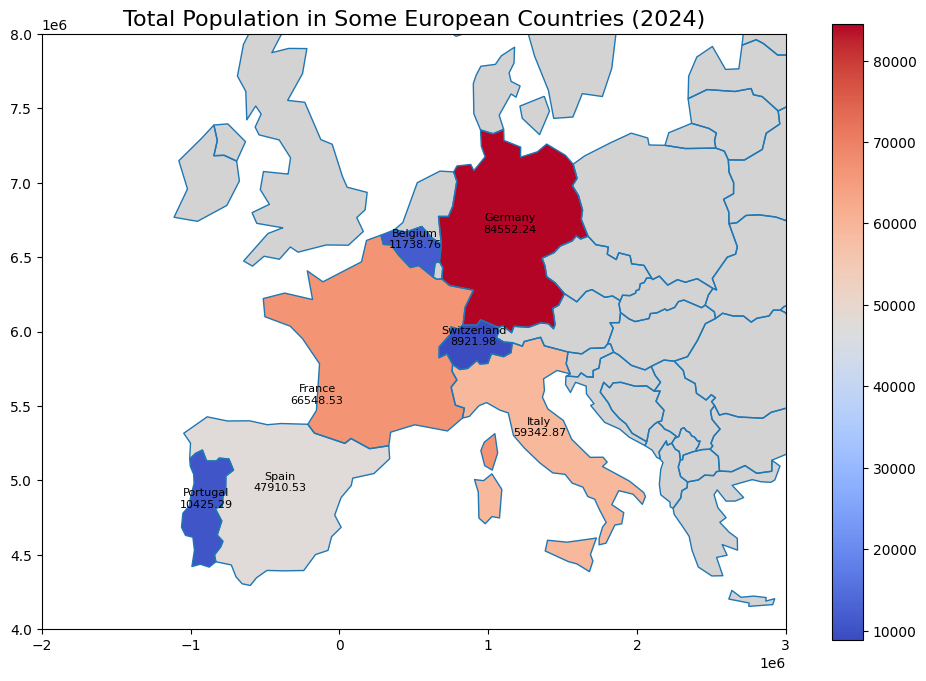

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

shapefile_path = '../world_happiness/natural_earth_vector/110m_cultural/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# filter out the countries in Europe
europe = world[world['CONTINENT'] == 'Europe']

# example countries to plot
countries_to_plot = ['Switzerland', 'Germany', 'France', 'Italy', 'Spain', 'Portugal', 'Belgium']
year = 2024
input_dir = './' 
file_path = os.path.join(input_dir, f'population_{year}.csv')

# data of 2024
yearly_data = pd.read_csv(file_path)

# filter out the data of countries in the example list
european_data = yearly_data[yearly_data['Location'].isin(countries_to_plot)][['Location', 'PopTotal']]

# merge the shapefile data with the example data
europe = europe.merge(european_data[['Location', 'PopTotal']], left_on='NAME', right_on='Location', how='left')

# cast the coordinate reference system to Web Mercator
europe = europe.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# set the range of longitude and latitude
xlim = (-2000000, 3000000)  
ylim = (4000000, 8000000) 

europe.boundary.plot(ax=ax, linewidth=1)
europe.plot(column='PopTotal', ax=ax, legend=True, cmap='coolwarm', missing_kwds={"color": "lightgrey"})

for x, y, label, score in zip(europe.geometry.centroid.x, europe.geometry.centroid.y, europe['NAME'], europe['PopTotal']):
    if not pd.isna(score):
        ax.text(x, y, f"{label}\n{score:.2f}", fontsize=8, ha='center', color='black')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('Total Population in Some European Countries (2024)', fontsize=16)
plt.show()